# FERTILITY 

# Import Libraries 


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load Data 

In [2]:
df = pd.read_csv("/kaggle/input/fertility-data-set/fertility.csv")
df.head()

,Season,Age,Childish diseases,Accident or serious trauma,Surgical intervention,High fevers in the last year,Frequency of alcohol consumption,Smoking habit,Number of hours spent sitting per day,Diagnosis
0,spring,30,no,yes,yes,more than 3 months ago,once a week,occasional,16,Normal
1,spring,35,yes,no,yes,more than 3 months ago,once a week,daily,6,Altered
2,spring,27,yes,no,no,more than 3 months ago,hardly ever or never,never,9,Normal
3,spring,32,no,yes,yes,more than 3 months ago,hardly ever or never,never,7,Normal
4,spring,30,yes,yes,no,more than 3 months ago,once a week,never,9,Altered


# Data Analysis 

In [3]:
df.shape

(100, 10)

In [4]:
df.isnull().sum()

Season                                   0
Age                                      0
Childish diseases                        0
Accident or serious trauma               0
Surgical intervention                    0
High fevers in the last year             0
Frequency of alcohol consumption         0
Smoking habit                            0
Number of hours spent sitting per day    0
Diagnosis                                0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Season                                 100 non-null    object
 1   Age                                    100 non-null    int64 
 2   Childish diseases                      100 non-null    object
 3   Accident or serious trauma             100 non-null    object
 4   Surgical intervention                  100 non-null    object
 5   High fevers in the last year           100 non-null    object
 6   Frequency of alcohol consumption       100 non-null    object
 7   Smoking habit                          100 non-null    object
 8   Number of hours spent sitting per day  100 non-null    int64 
 9   Diagnosis                              100 non-null    object
dtypes: int64(2), object(8)
memory usage: 7.9+ KB


In [6]:
df.describe()

,Age,Number of hours spent sitting per day
count,100.000000,100.000000
mean,30.110000,10.800000
std,2.246861,33.616975
min,27.000000,1.000000
25%,28.000000,5.000000
50%,30.000000,7.000000
75%,32.000000,9.000000
max,36.000000,342.000000


In [7]:
df.columns

Index(['Season', 'Age', 'Childish diseases', 'Accident or serious trauma',
       'Surgical intervention', 'High fevers in the last year',
       'Frequency of alcohol consumption', 'Smoking habit',
       'Number of hours spent sitting per day', 'Diagnosis'],
      dtype='object')

In [8]:
df["Season"].value_counts()

Season
spring    37
fall      31
winter    28
summer     4
Name: count, dtype: int64

In [9]:
df["Childish diseases"].value_counts()

Childish diseases
yes    87
no     13
Name: count, dtype: int64

In [10]:
df["Accident or serious trauma"].value_counts()

Accident or serious trauma
no     56
yes    44
Name: count, dtype: int64

In [11]:
df["Accident or serious trauma"].value_counts()

Accident or serious trauma
no     56
yes    44
Name: count, dtype: int64

In [12]:
df["High fevers in the last year"].value_counts()

High fevers in the last year
more than 3 months ago    63
no                        28
less than 3 months ago     9
Name: count, dtype: int64

In [13]:
df["Frequency of alcohol consumption"].value_counts()

Frequency of alcohol consumption
hardly ever or never    40
once a week             39
several times a week    19
several times a day      1
every day                1
Name: count, dtype: int64

In [14]:
df["Smoking habit"].value_counts()

Smoking habit
never         56
occasional    23
daily         21
Name: count, dtype: int64

In [15]:
df["Diagnosis"].value_counts()

Diagnosis
Normal     88
Altered    12
Name: count, dtype: int64

In [16]:
df.dtypes

Season                                   object
Age                                       int64
Childish diseases                        object
Accident or serious trauma               object
Surgical intervention                    object
High fevers in the last year             object
Frequency of alcohol consumption         object
Smoking habit                            object
Number of hours spent sitting per day     int64
Diagnosis                                object
dtype: object

In [17]:
df['Diagnosis'].value_counts()

Diagnosis
Normal     88
Altered    12
Name: count, dtype: int64

# Data preprocessing and Splitting 

**ENCODING**

In [18]:
cols_to_encode = ['Season', 'Childish diseases', 'Accident or serious trauma','Surgical intervention','High fevers in the last year','Frequency of alcohol consumption','Smoking habit']

# Initialize the LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each column
for col in cols_to_encode:
    df[col] = le.fit_transform(df[col])

In [19]:
df.head()

,Season,Age,Childish diseases,Accident or serious trauma,Surgical intervention,High fevers in the last year,Frequency of alcohol consumption,Smoking habit,Number of hours spent sitting per day,Diagnosis
0,1,30,0,1,1,1,2,2,16,Normal
1,1,35,1,0,1,1,2,0,6,Altered
2,1,27,1,0,0,1,1,1,9,Normal
3,1,32,0,1,1,1,1,1,7,Normal
4,1,30,1,1,0,1,2,1,9,Altered


In [20]:
X = df.drop("Diagnosis",axis=1)
y = df['Diagnosis']

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state =42)

# Model Implementation

Accuracy: 90.00%

Classification Report:
               precision    recall  f1-score   support

     Altered       0.00      0.00      0.00         2
      Normal       0.90      1.00      0.95        18

    accuracy                           0.90        20
   macro avg       0.45      0.50      0.47        20
weighted avg       0.81      0.90      0.85        20

Confusion Matrix:
 [[ 0  2]
 [ 0 18]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


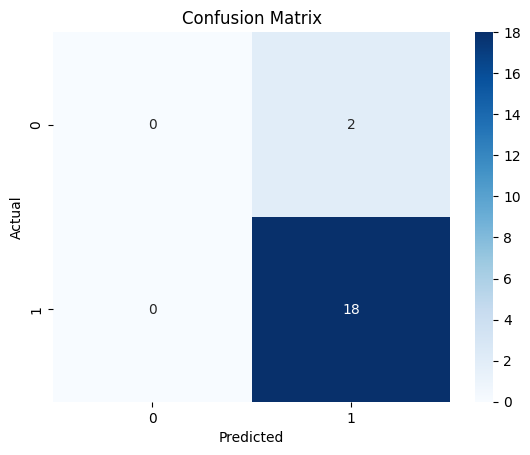

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Initialize and train Random Forest with class_weight='balanced'
clf = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',  # <-- This line balances the classes
    random_state=42
)

clf.fit(X_train, y_train)

# ✅ Predictions
y_pred = clf.predict(X_test)

# ✅ Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%\n")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ✅ Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()